## Classification of patient abstracts

Medical abstracts describe the current conditions of a patient. Doctors routinely scan dozens or hundreds of abstracts each day as they do their rounds in a hospital and must quickly pick up on the salient information pointing to the patient’s malady. You are trying to design assistive technology that can identify, with high precision, the class of problems described in the abstract. In the given dataset, abstracts from 5 different conditions have been included: 
1. Digestive system diseases
2. Cardiovascular diseases
3. Neoplasms
4. Nervous system diseases
5. General pathological conditions.

The training dataset consists of 14438 records and the test dataset consists of 14442 records. The train data has classes whereas, the test data classes are needed to be predicted.

The data are provided as text in train.dat and test.dat, which should be processed appropriately.

Data obtained from Kaggle (https://www.kaggle.com/datasets/chaitanyakck/medical-text)

In [121]:
# import libs
import pandas as pd
import spacy
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
labels = []
text = []

with open("data/train.dat", 'r') as dataset:
    dataset_lines = dataset.readlines()
for line in dataset_lines:
    split_line = line.split("\t")
    labels.append(split_line[0])
    text.append(split_line[1])

df = pd.DataFrame({'labels':labels, 'abstract':text})
df['labels'] = df['labels'].astype(dtype='int')
df['abstract'] = df['abstract'].astype(dtype='string') 

# lowercase letters
df['abstract'] = df['abstract'].apply(lambda x: x.lower())

Axes(0.125,0.11;0.775x0.77)


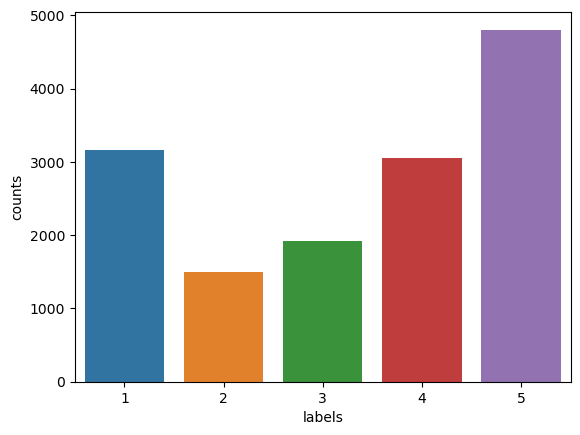

In [123]:
# check for label imbalances
#df['labels'].plot.hist()
label_count = df['labels'].value_counts()
label_count = pd.DataFrame({"labels":label_count.index, 'counts': label_count.values})
print(sns.barplot(x='labels', y='counts', data=label_count))


In [124]:
from nltk.tokenize import RegexpTokenizer
# tokenize the abstracts
regexp = RegexpTokenizer(r'\w+')

df['tokenized_abstract'] = df['abstract'].apply(regexp.tokenize)


In [125]:
# Removing common words

from nltk.corpus import stopwords

# make a list of english stopwords
stopwords = stopwords.words('english')
add_stopwords = ['the', 'and', 'of','in', 'with', 'a', 'too', 'was', 'were', 'patients' ]
stopwords.extend(add_stopwords)


# remove stop words
df['cropped_abstract'] = df['tokenized_abstract'].apply(lambda x: [word for word in x if word not in stopwords])

# remove words smaller than 3 charecters
df['cropped_abstract'] = df['cropped_abstract'].apply(lambda x: [word for  word in x if len(word) >= 3] )

# combine clean word list
df['clean_abstract'] = df['cropped_abstract'].apply(lambda x: " ".join(x))
df.head()

,labels,abstract,tokenized_abstract,cropped_abstract,clean_abstract
0,4,catheterization laboratory events and hospital...,"[catheterization, laboratory, events, and, hos...","[catheterization, laboratory, events, hospital...",catheterization laboratory events hospital out...
1,5,renal abscess in children. three cases of rena...,"[renal, abscess, in, children, three, cases, o...","[renal, abscess, children, three, cases, renal...",renal abscess children three cases renal absce...
2,2,hyperplastic polyps seen at sigmoidoscopy are ...,"[hyperplastic, polyps, seen, at, sigmoidoscopy...","[hyperplastic, polyps, seen, sigmoidoscopy, ma...",hyperplastic polyps seen sigmoidoscopy markers...
3,5,subclavian artery to innominate vein fistula a...,"[subclavian, artery, to, innominate, vein, fis...","[subclavian, artery, innominate, vein, fistula...",subclavian artery innominate vein fistula inse...
4,4,effect of local inhibition of gamma-aminobutyr...,"[effect, of, local, inhibition, of, gamma, ami...","[effect, local, inhibition, gamma, aminobutyri...",effect local inhibition gamma aminobutyric aci...


In [126]:
# lemmatizing input strings
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()
df['lemmatized_abstract'] = df['clean_abstract'].apply(lemma.lemmatize)
lemma_list = df['clean_abstract'] == df['lemmatized_abstract']
print("Total Words Lemmatized: ", len(lemma_list))
print()
df.head()

Total Words Lemmatized:  14438



,labels,abstract,tokenized_abstract,cropped_abstract,clean_abstract,lemmatized_abstract
0,4,catheterization laboratory events and hospital...,"[catheterization, laboratory, events, and, hos...","[catheterization, laboratory, events, hospital...",catheterization laboratory events hospital out...,catheterization laboratory events hospital out...
1,5,renal abscess in children. three cases of rena...,"[renal, abscess, in, children, three, cases, o...","[renal, abscess, children, three, cases, renal...",renal abscess children three cases renal absce...,renal abscess children three cases renal absce...
2,2,hyperplastic polyps seen at sigmoidoscopy are ...,"[hyperplastic, polyps, seen, at, sigmoidoscopy...","[hyperplastic, polyps, seen, sigmoidoscopy, ma...",hyperplastic polyps seen sigmoidoscopy markers...,hyperplastic polyps seen sigmoidoscopy markers...
3,5,subclavian artery to innominate vein fistula a...,"[subclavian, artery, to, innominate, vein, fis...","[subclavian, artery, innominate, vein, fistula...",subclavian artery innominate vein fistula inse...,subclavian artery innominate vein fistula inse...
4,4,effect of local inhibition of gamma-aminobutyr...,"[effect, of, local, inhibition, of, gamma, ami...","[effect, local, inhibition, gamma, aminobutyri...",effect local inhibition gamma aminobutyric aci...,effect local inhibition gamma aminobutyric aci...


In [ ]:
# find most common words per label
df_1 = df[df['labels'] == 1]
df_2 = df.query('labels == 2')
df_3 = df.query('labels == 3')
df_4 = df.query('labels == 4')
df_5 = df.query('labels == 5')

<FreqDist with 37216 samples and 1534642 outcomes>


(-0.5, 599.5, 399.5, -0.5)

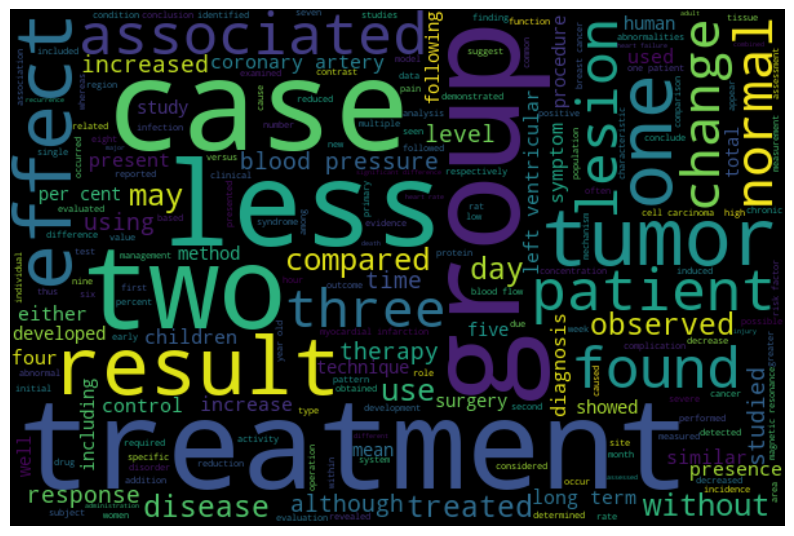

In [127]:
# Creatig a fequency distribution of words in abstract per label
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words = " ".join(words for words in df['lemmatized_abstract'])
tokenized_list = nltk.word_tokenize(all_words)
freq_dist = nltk.FreqDist(tokenized_list)
print(freq_dist)

wordcloud = WordCloud(width=600,
                      height=400,
                      random_state=2,
                      max_font_size=100).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [128]:
print(len(freq_dist))
for i,key in enumerate(freq_dist):
    if i <= 100:
        print(key, ": ", str(freq_dist[key]))
    else:
        break

37216
disease :  7504
less :  7486
group :  6389
treatment :  6161
two :  5659
study :  5512
one :  5303
may :  5037
patient :  4892
blood :  4562
cases :  4490
years :  4447
cell :  4431
clinical :  4356
cells :  4251
results :  4239
associated :  3940
three :  3871
therapy :  3780
normal :  3716
mean :  3595
tumor :  3543
risk :  3504
cancer :  3488
significantly :  3467
coronary :  3461
significant :  3456
acute :  3381
pressure :  3367
rate :  3297
age :  3283
increased :  3221
months :  3209
compared :  3184
artery :  3039
high :  3007
ventricular :  2967
treated :  2927
control :  2892
also :  2822
found :  2767
surgery :  2725
year :  2713
diagnosis :  2643
time :  2634
greater :  2633
levels :  2623
left :  2574
four :  2530
carcinoma :  2521
syndrome :  2504
heart :  2503
chronic :  2463
groups :  2450
without :  2448
used :  2442
showed :  2438
case :  2377
effects :  2307
studies :  2304
using :  2302
cardiac :  2291
survival :  2284
human :  2267
lesions :  2260
tumors :  2

In [ ]:
# data augmentation to reduce label imbalances

# Planning on using Med-BERT embedding model to augment data. However, the pretrained model is now unavailable to be used due to licensing issues. 
